# Sign Language Digits Recognizer

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import cv2
from tqdm import tqdm
import random

## Load the dataset

In [2]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
IMG_SIZE = 100

In [3]:
def loadData(DIR):
    X = []
    Y = []
    for number in numbers:
        path = os.path.join(DIR, str(number))
        for img in tqdm(os.listdir(path)):
            arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            resized_arr = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))
            X.append(resized_arr)
            Y.append(number)
    return (np.array(X), np.array(Y))

In [4]:
DIR = '../Large Datasets/SignLanguageNumbers/'
(X, Y) = loadData(DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 204/204 [00:00<00:00, 367.63it/s]


## Data Visualization

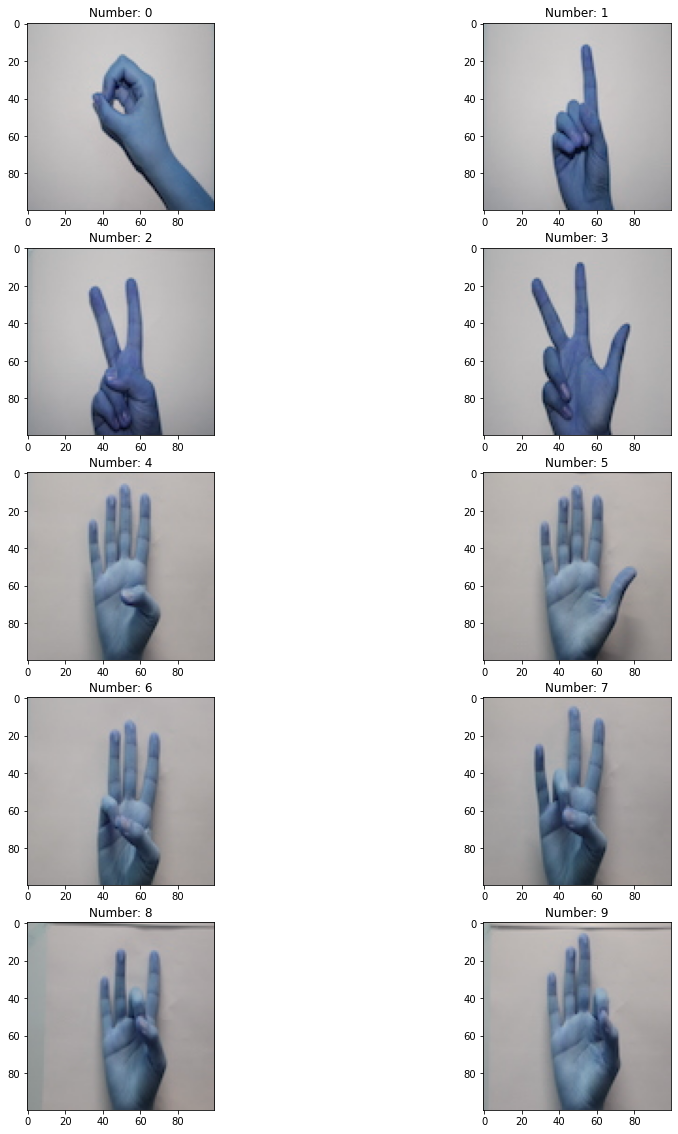

In [5]:
# 1 image of each of the numbers
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 20)
l = 0
for i in range(5):
    for j in range(2):
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Number: ' + str(Y[l]))
        l = l + 207

## Preprocessing of data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
# normalize the data
X = X / 255

# reshape the data
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y = Y.reshape(-1, 1)
Y = keras.utils.to_categorical(Y, 10)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(1649, 100, 100, 3)
Y_train shape:(1649, 10)
X_test shape:(413, 100, 100, 3)
Y_test shape:(413, 10)


## CNN Model

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten
from keras.layers import Dense

In [10]:
model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.5),
        Dense(10, activation = 'softmax')
    ]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs = 8, validation_split = 0.2)

Epoch 1/8
42/42 [==============================] - 39s 934ms/step - loss: 2.3161 - accuracy: 0.1031 - val_loss: 2.3030 - val_accuracy: 0.0909
Epoch 2/8
42/42 [==============================] - 43s 1s/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.2836 - val_accuracy: 0.1697
Epoch 3/8
42/42 [==============================] - 43s 1s/step - loss: 1.6851 - accuracy: 0.4109 - val_loss: 0.8269 - val_accuracy: 0.6939
Epoch 4/8
42/42 [==============================] - 45s 1s/step - loss: 0.6302 - accuracy: 0.7923 - val_loss: 0.4181 - val_accuracy: 0.8485
Epoch 5/8
42/42 [==============================] - 42s 991ms/step - loss: 0.3688 - accuracy: 0.8795 - val_loss: 0.2388 - val_accuracy: 0.9212
Epoch 6/8
42/42 [==============================] - 42s 1s/step - loss: 0.2050 - accuracy: 0.9393 - val_loss: 0.1857 - val_accuracy: 0.9455
Epoch 7/8
42/42 [==============================] - 43s 1s/step - loss: 0.1180 - accuracy: 0.9689 - val_loss: 0.1848 - val_accuracy: 0.9485
Epoch 8/8
42/42 [====

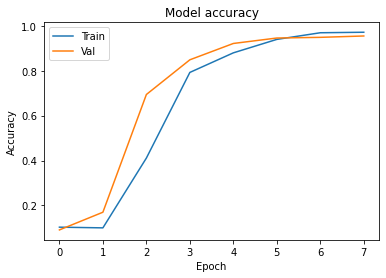

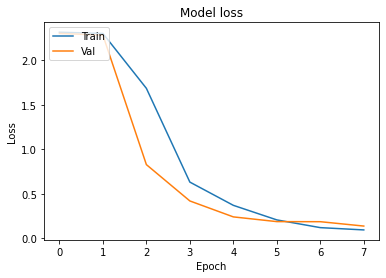

In [14]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [15]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on test set is %f" %(test_acc * 100)  + "%")

13/13 [==============================] - 4s 274ms/step - loss: 0.1059 - accuracy: 0.9637
Accuracy on train set is 98.726499%
Accuracy on test set is 96.368039%


## Saving our model and creating TensorFlow Lite object

In [16]:
# Save our model locally
keras_file = "sign_digits.h5"
model.save(keras_file)

In [17]:
# Convert keras file to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("SignDigitsModel.tflite", "wb").write(tflite_model);

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\SAMYAK~1\AppData\Local\Temp\tmp42fivn1i\assets
